# Homework #5  (Due date: 3rd of August, 23:59)
- Download the Mall Customer Segmentation Data from our github repo.
- Use only 3 features (Age, Income and Spending Score) and run k-means algorithm. Determine/choose the optimum "k" value using the elbow method. Show your plot (error vs. k)
- Again with the same 3 features, scatter your data in a 3D plot. Coloring of samples should denote the determined categories (your optimum k). I.e. we should be able to distinguish the samples of k categories. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import v_measure_score, completeness_score, homogeneity_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

In [2]:
import pandas as pd
!git clone https://github.com/UMBC-Data-Science/DATA602Datasets.git
df = pd.read_csv("Mall_Customers.csv")
df.head(3)

'git' is not recognized as an internal or external command,
operable program or batch file.


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


Used only 3 features (Age, Income as X, and Spending Score as y) and runned the k-means algorithm. So depending on the customer age and annual income we can know whether the spending score of the customer is high, low or moderate.

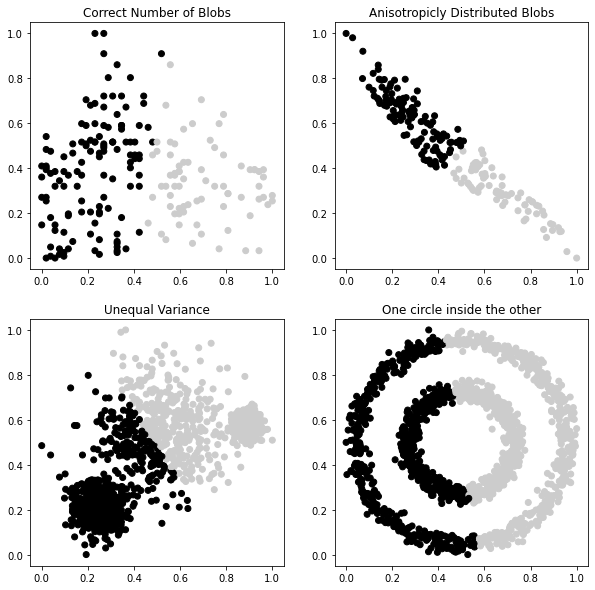

In [3]:
#Example from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py 

def plot_2d_examples(cluster_model):
  plt.figure(figsize=(10, 10))

  n_samples = 1500
  random_state = 170
  #X, y = make_blobs(n_samples=n_samples, random_state=random_state)
  #print(X.shape)
  #print(y.shape)
  X = df.iloc[:, [2,3]].values
  y= df.iloc[:, [4]].values
  mall_df = (X, y) 
  X = MinMaxScaler().fit_transform(X)

  ## Correct number of clusters
  y_pred = cluster_model.fit_predict(X)

  plt.subplot(221)
  plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.nipy_spectral)
  plt.title("Correct Number of Blobs")

  ## Anisotropicly distributed data
  transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
  X_aniso = np.dot(X, transformation)
  X_aniso = MinMaxScaler().fit_transform(X_aniso)
  y_pred = cluster_model.fit_predict(X_aniso)  # we run clustering algorithm

  plt.subplot(222)
  plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred, cmap=plt.cm.nipy_spectral)
  plt.title("Anisotropicly Distributed Blobs")

  ## Different variance
  X_varied, y_varied = make_blobs(n_samples=n_samples,
                                  cluster_std=[1.0, 2.5, 0.5],
                                  random_state=random_state)

  #dataset2 = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)[0]
  X_varied = MinMaxScaler().fit_transform(X_varied)
  y_pred = cluster_model.fit_predict(X_varied)  # we run clustering algorithm

  plt.subplot(223)
  plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred, cmap=plt.cm.nipy_spectral)
  plt.title("Unequal Variance")

  ## Unevenly sized blobs
  #X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
  #X_filtered = MinMaxScaler().fit_transform(X_filtered)
  #y_pred = cluster_model.fit_predict(X_filtered) # we run clustering algorithm

  #plt.subplot(224)
  #plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred, cmap=plt.cm.nipy_spectral)
  #plt.title("Unevenly Sized Blobs")

  # One circle inside the other
  X_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)[0]
  X_circles = MinMaxScaler().fit_transform(X_circles)
  y_pred = cluster_model.fit_predict(X_circles) # we run clustering algorithm
  
  plt.subplot(224)
  plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_pred, cmap=plt.cm.nipy_spectral)
  plt.title("One circle inside the other")

  plt.show()
  
plot_2d_examples(KMeans(n_clusters=2))

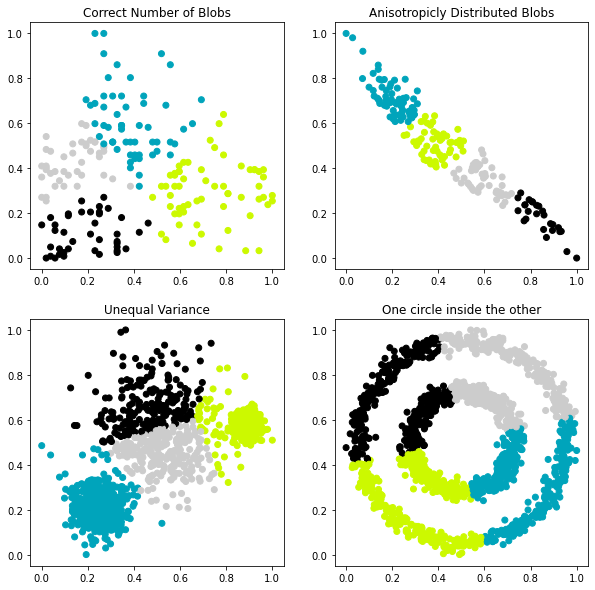

In [4]:
plot_2d_examples(KMeans(n_clusters=4))

## Elbow method:
Used elbow method to choose the optimum K value. When we considered the K value as 4 randomly, we can see that the data is clustered poorly which leads in poor data categorization. In the elbow plot we can see that the score stops improving after 5. So we can consider the optimum value for K as 5. When we used K value as 5 with centroids we are able to categorize the data better.
Below are the two plots when K=4 and K=5. Through which we have differentiated the plots (error vs. k)

In [5]:
X = df.iloc[:, [2,3]].values
y= df.iloc[:, [4]].values

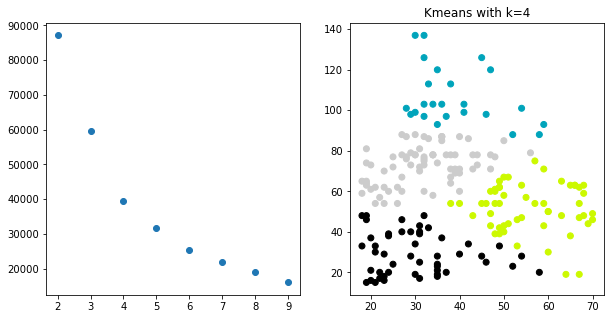

In [6]:
scores = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  scores.append( -kmeans.score(X) )
  
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot([k for k in range(2,10)], scores, 'o')

n_clusters=4
y_pred = KMeans(n_clusters=n_clusters).fit_predict(X)

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.nipy_spectral)
plt.title("Kmeans with k=" + str(n_clusters))

plt.show()


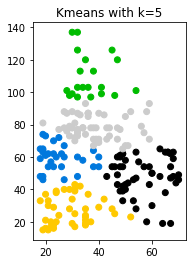

In [7]:
n_clusters=5
y_pred = KMeans(n_clusters=n_clusters).fit_predict(X,y)

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.nipy_spectral)
plt.title("Kmeans with k=" + str(n_clusters))

plt.show()

In [8]:
KMeans_model = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [9]:
y_KMeans = KMeans_model.fit_predict(X)

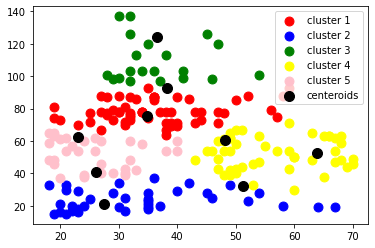

In [10]:
plt.scatter(X[y_KMeans==0,0], X[y_KMeans==0,1], s=80, c='red', label = 'cluster 1')
plt.scatter(X[y_KMeans==1,0], X[y_KMeans==1,1], s=80, c='blue', label = 'cluster 2')
plt.scatter(X[y_KMeans==2,0], X[y_KMeans==2,1], s=80, c='green', label = 'cluster 3')
plt.scatter(X[y_KMeans==3,0], X[y_KMeans==3,1], s=80, c='yellow', label = 'cluster 4')
plt.scatter(X[y_KMeans==4,0], X[y_KMeans==4,1], s=80, c='pink', label = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label = 'centeroids')
plt.legend()
plt.show()

Used 3 features, and plotted 3D plot (X as age, y as Annual Income, and z as spending score). Through the 3D plot we are able to determine the different categories with 5 as optimum K value. the 5 diffrent coloured clusters represent the samples of k(5) categories.

In [11]:
X = df.iloc[:, [2,3,4]].values

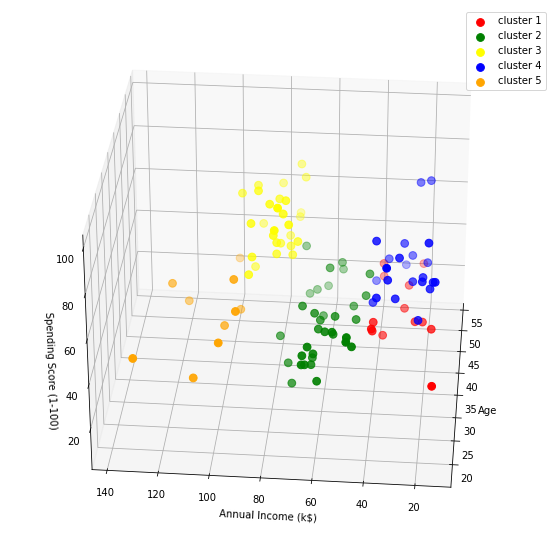

In [12]:
clusters = kmeans.fit_predict(X)
df["label"]=clusters
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label==0], df["Annual Income (k$)"][df.label==0], df["Spending Score (1-100)"][df.label==0], c='red', s=60, label = 'cluster 1')
ax.scatter(df.Age[df.label==1], df["Annual Income (k$)"][df.label==1], df["Spending Score (1-100)"][df.label==1], c='green', s=60, label = 'cluster 2')
ax.scatter(df.Age[df.label==2], df["Annual Income (k$)"][df.label==2], df["Spending Score (1-100)"][df.label==2], c='yellow', s=60, label = 'cluster 3')
ax.scatter(df.Age[df.label==3], df["Annual Income (k$)"][df.label==3], df["Spending Score (1-100)"][df.label==3], c='blue', s=60, label = 'cluster 4')
ax.scatter(df.Age[df.label==4], df["Annual Income (k$)"][df.label==4], df["Spending Score (1-100)"][df.label==4], c='orange', s=60, label = 'cluster 5')
ax.view_init(30,185)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()